Published on October 03, 2023. By Marília Prata, mpwolke.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [5]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    'Dataset/train',  # Path to training data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'Dataset/test',  # Path to testing data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 2609 images belonging to 19 classes.
Found 897 images belonging to 20 classes.


#Number of classes check above

In [6]:
path = 'Dataset/train/' #Don't forget that last bar

In [7]:
class_names = sorted(os.listdir(path))
num_classes = len(class_names)

img_size = (192, 192, 3)

print('classes: ', class_names)

classes:  ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


#Epochs

In [8]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

import cv2

labels = []
images = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
        
        image = np.asarray(cv2.resize(cv2.imread(path + cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1])#That line remove Blue
        
        #image = np.asarray(cv2.resize(cv2.imread(data_path + cl + '/' + img, cv2.COLOR_BGR2RGB), img_size[0:2]))
        images.append(image)
    print('done')

    
labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

images:

Acne and Rosacea Photos -> done
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions -> done
Atopic Dermatitis Photos -> done
Cellulitis Impetigo and other Bacterial Infections -> done
Eczema Photos -> done
Exanthems and Drug Eruptions -> done
Herpes HPV and other STDs Photos -> done
Light Diseases and Disorders of Pigmentation -> done
Lupus and other Connective Tissue diseases -> done
Melanoma Skin Cancer Nevi and Moles -> done
Poison Ivy Photos and other Contact Dermatitis -> done
Psoriasis pictures Lichen Planus and related diseases -> done
Seborrheic Keratoses and other Benign Tumors -> done
Systemic Disease -> done
Tinea Ringworm Candidiasis and other Fungal Infections -> done
Urticaria Hives -> done
Vascular Tumors -> done
Vasculitis Photos -> done
Warts Molluscum and other Viral Infections -> done


labels shape: (2609, 19)
images shape: (2609, 192, 192, 3)


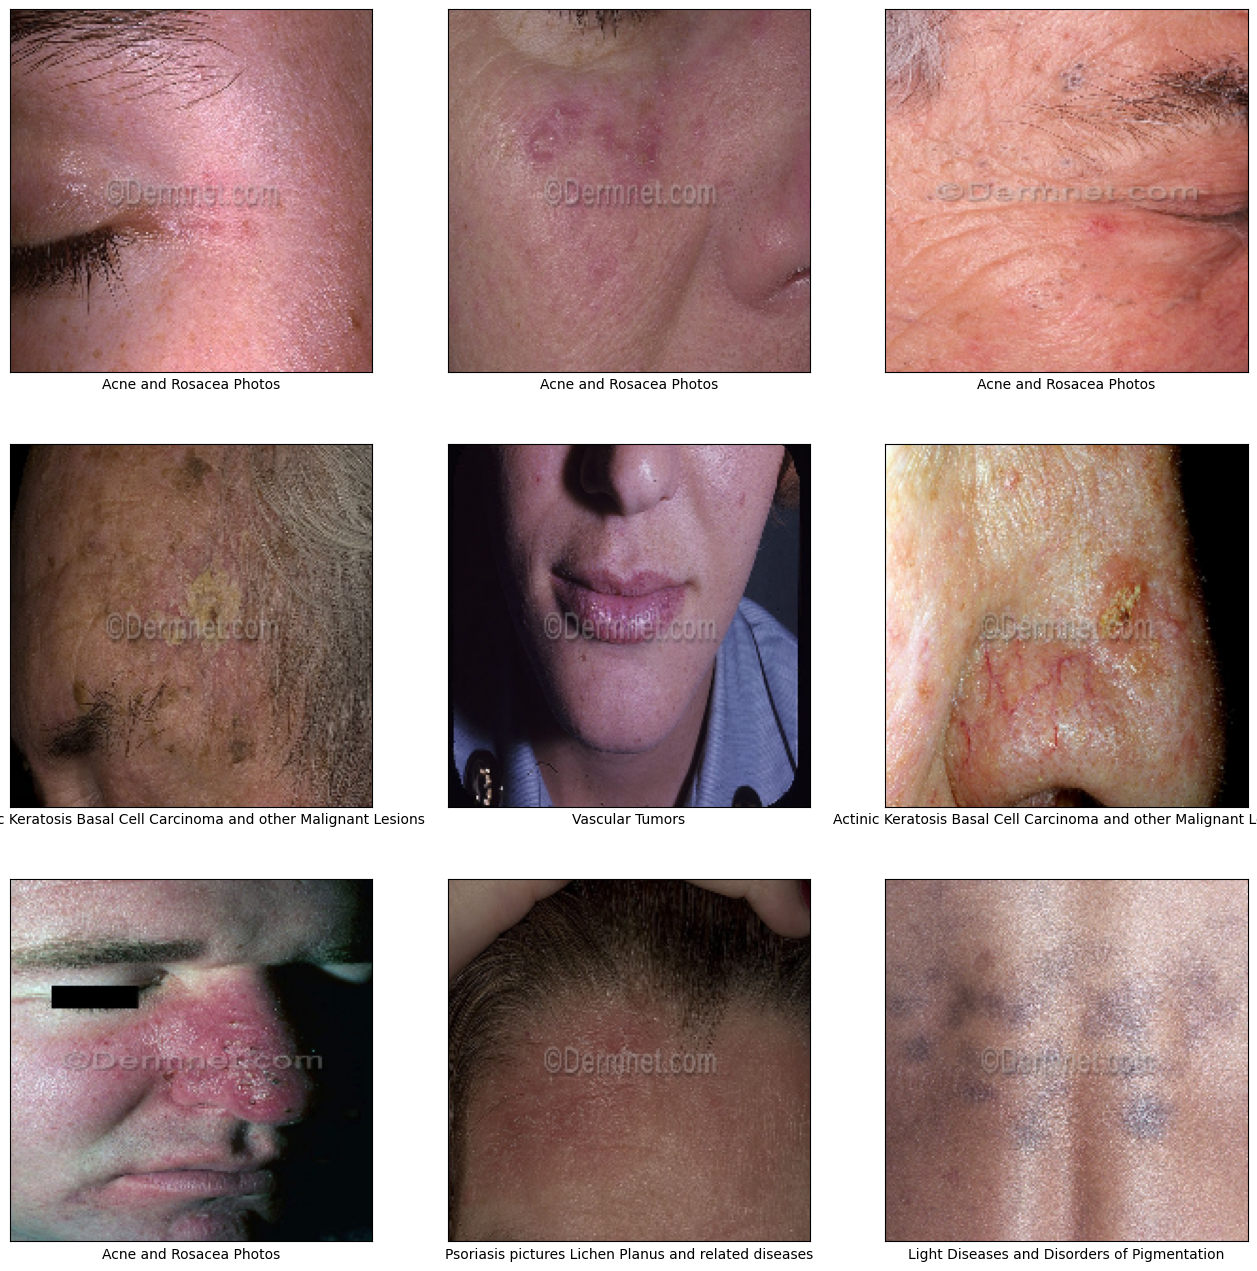

In [9]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/cnn-cheetahs-and-lions-classifier

from random import randint

fig, axs = plt.subplots(3, 3, figsize=(16, 16))#Original was 10,6

for x in range(3):
    for y in range(3):
        i = randint(0, len(images))
        
        axs[x][y].imshow(images[i])
        
                    
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
        
        
plt.show()

In [10]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (2217, 192, 192, 3)
train labels shape: (2217, 19)

validation images shape: (392, 192, 192, 3)
validation labels shape: (392, 19)



#CNN Model

In [13]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

import tensorflow as tf

cnn_model = tf.keras.Sequential()

# Inputs and rescaling
cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))

# Convolutional block 1
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 2
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 3
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 4
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())

# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 192, 192, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 192, 192, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 192, 192, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 96, 96, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 96, 96, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 96, 96, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 48, 48, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 24, 24, 512)    │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 24, 24, 512)    │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 19)             │         1,235 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,021,907 (80.19 MB)

 Trainable params: 21,021,907 (80.19 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier


# creating ModelChecpoint callback
from tensorflow.keras.callbacks import ModelCheckpoint

# Corrected checkpoint callback
checkpoint_callback = ModelCheckpoint('cnn_model/model{epoch:02d}.keras')


#Epochs 20

In [15]:
history = cnn_model.fit(images, labels, epochs=20, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])

Epoch 1/20
 3/82 ━━━━━━━━━━━━━━━━━━━━ 12:32 10s/step - accuracy: 0.0608 - loss: 3.3111

KeyboardInterrupt: 

In [12]:


# Save the model after training
cnn_model.save('skin_disease_CUSTOM_CNN_model.h5')
print("Model saved")


Model saved


In [13]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Predict on validation set
y_pred_probs = cnn_model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)  # if y_val is one-hot encoded

print("Custom CNN")
print(classification_report(y_true, y_pred, digits=2))

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy of the Model: {accuracy * 100:.1f}%")


13/13 [==============================] - 1s 38ms/step
Custom CNN
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       128
           1       1.00      1.00      1.00        47
           2       1.00      0.87      0.93        15
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      0.80      0.89        10
           7       1.00      0.94      0.97        48
           8       1.00      1.00      1.00        14
           9       0.80      1.00      0.89         4
          10       1.00      0.90      0.95        10
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00        10
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00         1
          16    

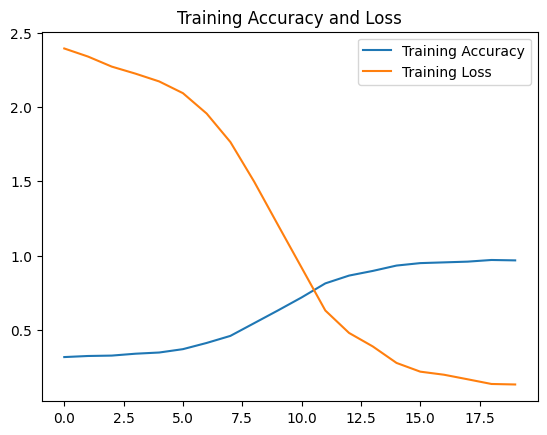

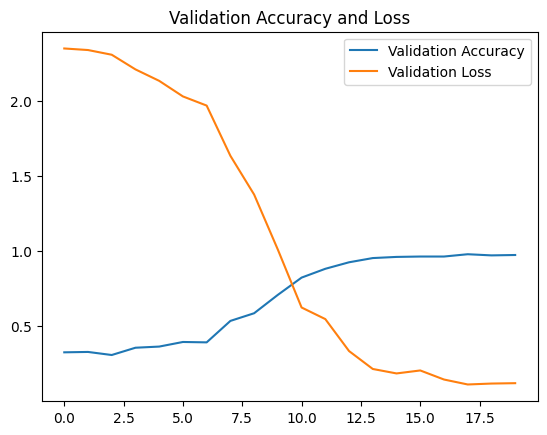

In [14]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()

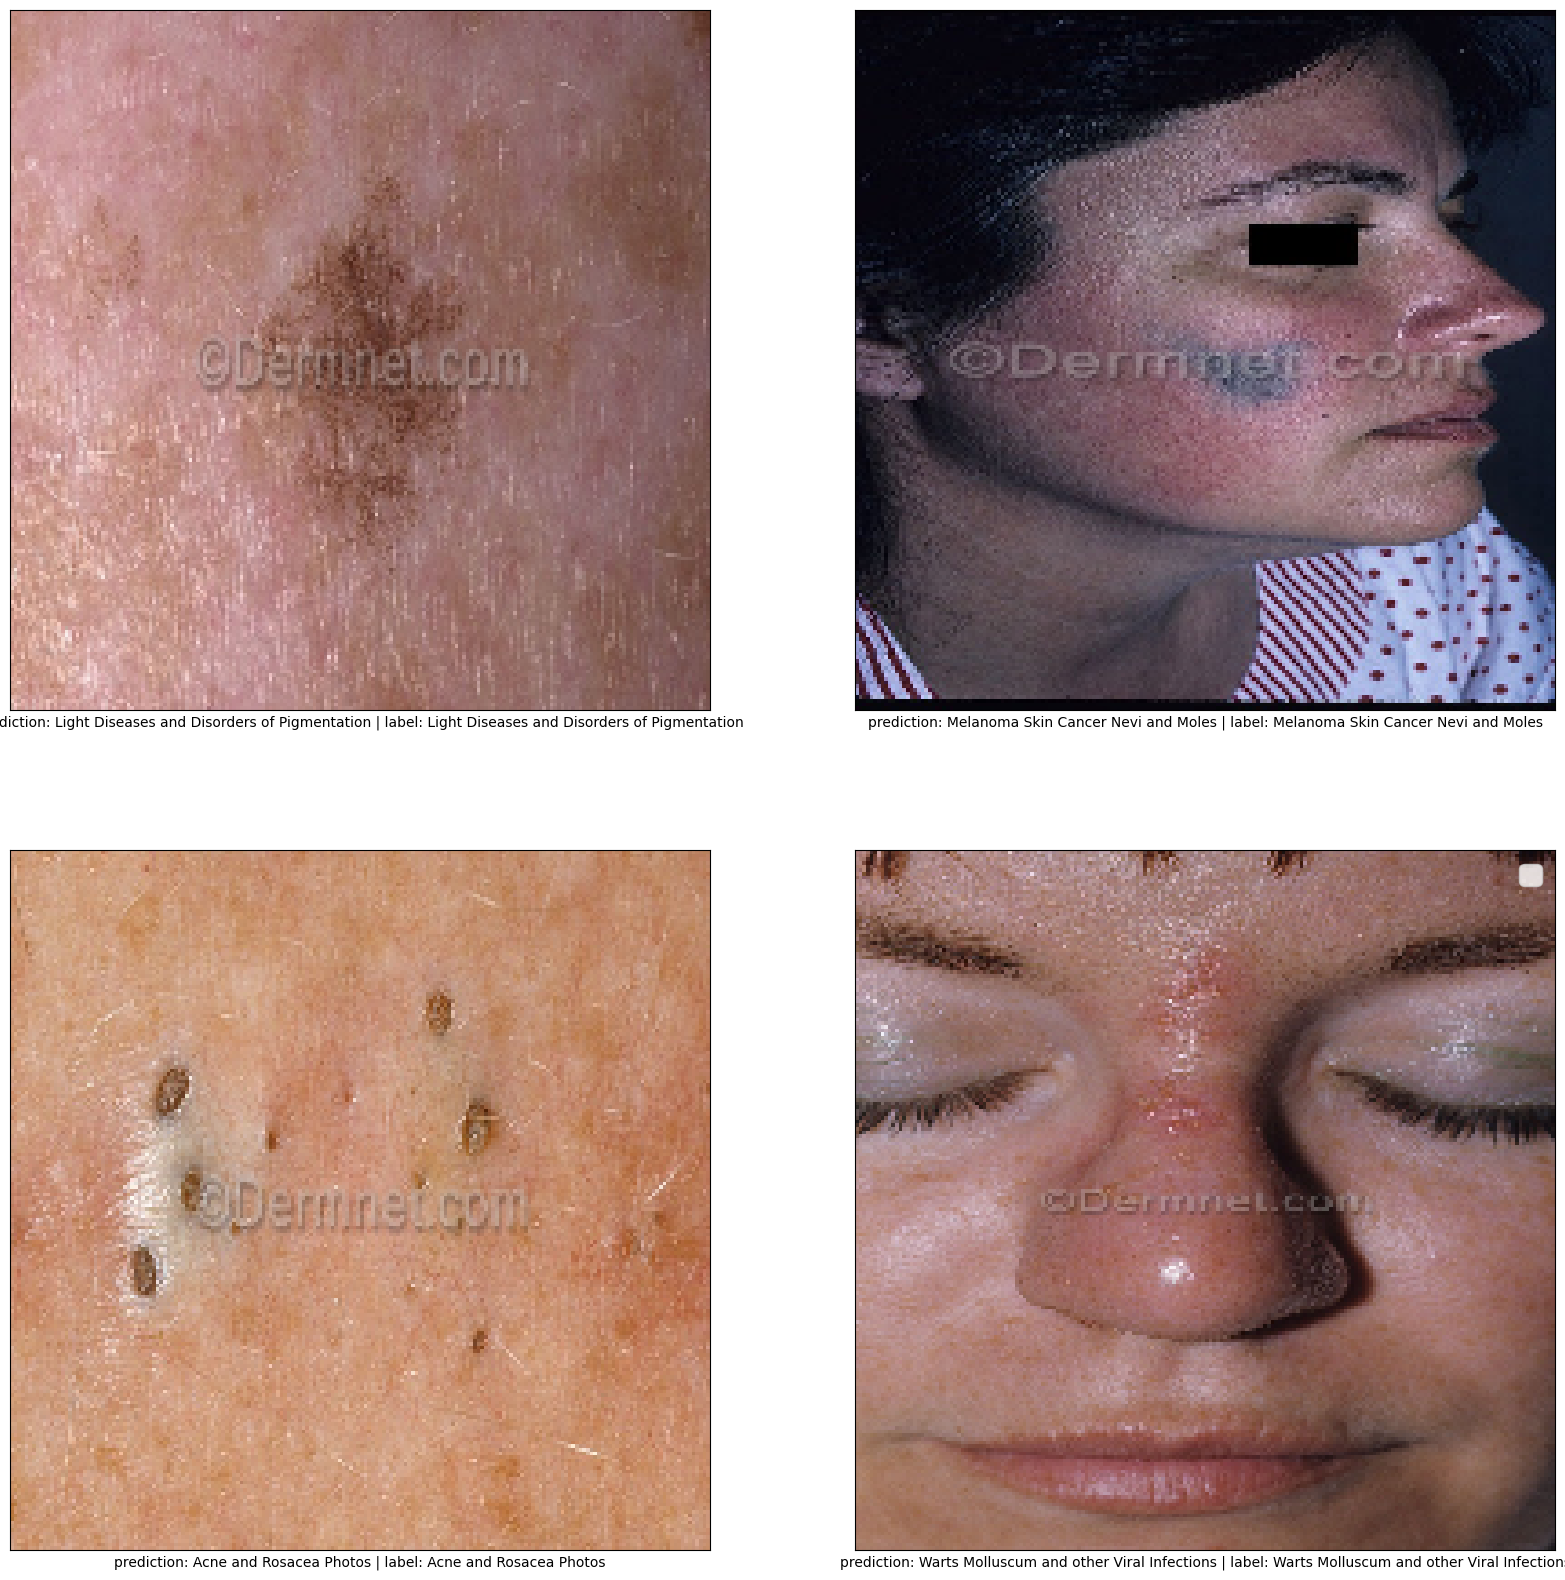

In [15]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

fig, axs = plt.subplots(2, 2, figsize=(20, 20))#Original was 7,4 (28 is higher than 25) and figsize 15,15
plt.legend(fontsize="20")#I can't read any of them

i = 0
for x in range(2): #Original was 7 so resulted in error 7X4 = 28
    for y in range(2):
        prediction = cnn_model.predict(X_val[i][None, ...], verbose=0)[0],
       
        
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(f'prediction: {class_names[np.argmax(prediction)]} | label: {class_names[np.argmax(y_val[i])]}')
        
        axs[x][y].imshow(X_val[i])
        
        i += 1
plt.show()
